In [1]:
from futu import *
import time
quote_ctx = OpenQuoteContext(host='127.0.0.1', port=11111)
ret, data = quote_ctx.get_option_expiration_date(code='HK.00700')
if ret == RET_OK:
    expiration_dates = data
else:
    print('error:', data)

2022-06-17 18:42:46,418 | 851442 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=1, host=127.0.0.1, port=11111, user_id=7465070


In [2]:
expiration_dates

,strike_time,option_expiry_date_distance,expiration_cycle
0,2022-06-29,12,N/A
1,2022-07-28,41,N/A
2,2022-08-30,74,N/A
3,2022-09-29,104,N/A
4,2022-12-29,195,N/A
5,2023-03-30,286,N/A
6,2023-06-29,377,N/A


In [3]:
date = expiration_dates['strike_time'][1]
date

'2022-07-28'

In [4]:
ret, data = quote_ctx.get_option_chain(code='HK.00700', start=date, end=date)
if ret == RET_OK:
    option_chains = data
else:
    print('error:', data)
option_chains    

,code,name,lot_size,stock_type,option_type,stock_owner,strike_time,strike_price,suspension,stock_id,index_option_type
0,HK.TCH220728C220000,腾讯 220728 220.00 购,100,DRVT,CALL,HK.00700,2022-07-28,220.0,False,80375999,N/A
1,HK.TCH220728P220000,腾讯 220728 220.00 沽,100,DRVT,PUT,HK.00700,2022-07-28,220.0,False,80376018,N/A
2,HK.TCH220728C225000,腾讯 220728 225.00 购,100,DRVT,CALL,HK.00700,2022-07-28,225.0,False,80376035,N/A
3,HK.TCH220728P225000,腾讯 220728 225.00 沽,100,DRVT,PUT,HK.00700,2022-07-28,225.0,False,80376007,N/A
4,HK.TCH220728C230000,腾讯 220728 230.00 购,100,DRVT,CALL,HK.00700,2022-07-28,230.0,False,80376024,N/A
...,...,...,...,...,...,...,...,...,...,...,...
99,HK.TCH220728P630000,腾讯 220728 630.00 沽,100,DRVT,PUT,HK.00700,2022-07-28,630.0,False,80376333,N/A
100,HK.TCH220728C640000,腾讯 220728 640.00 购,100,DRVT,CALL,HK.00700,2022-07-28,640.0,False,80376311,N/A
101,HK.TCH220728P640000,腾讯 220728 640.00 沽,100,DRVT,PUT,HK.00700,2022-07-28,640.0,False,80376304,N/A
102,HK.TCH220728C650000,腾讯 220728 650.00 购,100,DRVT,CALL,HK.00700,2022-07-28,650.0,False,80376650,N/A


In [5]:
mid = round(option_chains.shape[0]*0.3)
codes = option_chains['code'][mid:mid+10].tolist()
codes

['HK.TCH220728P295000',
 'HK.TCH220728C300000',
 'HK.TCH220728P300000',
 'HK.TCH220728C310000',
 'HK.TCH220728P310000',
 'HK.TCH220728C320000',
 'HK.TCH220728P320000',
 'HK.TCH220728C330000',
 'HK.TCH220728P330000',
 'HK.TCH220728C340000']

In [6]:
ret, data = quote_ctx.get_market_snapshot(codes)
if ret == RET_OK:
    snapshots = data
else:
    print('error:', data)

In [7]:
snapshots[['code','update_time','last_price','option_type','volume','strike_time','option_strike_price',
           'option_net_open_interest','option_implied_volatility',
           'option_delta','option_gamma','option_vega','option_theta']].rename(columns={
    'update_time':'更新时间','last_price':'最新价格','volume':'成交量','strike_time':'行权日','option_strike_price':'行权价',
    'option_net_open_interest':'未平仓数','option_implied_volatility':'隐含波动率','option_delta':'delta','option_gamma':'gamma',
    'option_vega':'vega','option_theta':'theta','option_type':'类型',
})

,code,更新时间,最新价格,类型,成交量,行权日,行权价,未平仓数,隐含波动率,delta,gamma,vega,theta
0,HK.TCH220728P295000,2022-06-17 15:22:42,1.84,PUT,560,2022-07-28,295.0,1392,47.182,-0.067,0.002,0.161,-0.091
1,HK.TCH220728C300000,2022-06-15 10:47:50,68.55,CALL,0,2022-07-28,300.0,380,52.841,0.895,0.002,0.223,-0.141
2,HK.TCH220728P300000,2022-06-17 15:59:26,2.18,PUT,575,2022-07-28,300.0,1037,46.281,-0.078,0.002,0.181,-0.101
3,HK.TCH220728C310000,2022-06-13 15:09:54,59.82,CALL,0,2022-07-28,310.0,95,50.401,0.867,0.003,0.264,-0.160
4,HK.TCH220728P310000,2022-06-17 15:38:46,3.17,PUT,306,2022-07-28,310.0,1999,44.914,-0.108,0.003,0.230,-0.125
5,HK.TCH220728C320000,2022-06-10 10:26:56,51.42,CALL,0,2022-07-28,320.0,708,48.211,0.832,0.004,0.310,-0.180
6,HK.TCH220728P320000,2022-06-17 15:52:13,4.66,PUT,574,2022-07-28,320.0,3969,43.654,-0.146,0.004,0.284,-0.150
7,HK.TCH220728C330000,2022-06-15 10:35:40,43.49,CALL,0,2022-07-28,330.0,882,46.611,0.786,0.005,0.359,-0.202
8,HK.TCH220728P330000,2022-06-17 15:58:07,6.31,PUT,471,2022-07-28,330.0,3039,42.632,-0.195,0.005,0.342,-0.177
9,HK.TCH220728C340000,2022-06-17 15:51:50,38.27,CALL,90,2022-07-28,340.0,905,44.740,0.733,0.005,0.406,-0.220


In [8]:
ret, data, page_req_key = quote_ctx.request_history_kline('HK.TCH210128C430000', start='2021-12-01', end='2021-12-04', max_count=5)  # 每页5个，请求第一页
if ret == RET_OK:
    print(data)
    print(data['code'][0])    # 取第一条的股票代码
    print(data['close'].values.tolist())   # 第一页收盘价转为 list
else:
    print('error:', data)

error: 未知股票 TCH210128C430000


### 波动率

In [9]:
from datetime import datetime,timedelta

In [10]:
start = (datetime.today() - timedelta(days=10*365)).strftime('%Y-%m-%d')
end = datetime.today().strftime('%Y-%m-%d')
start,end

('2012-06-19', '2022-06-17')

In [11]:
dataset = []
ret, data, page_req_key = quote_ctx.request_history_kline('HK.00700', start=start, end=end)
if ret == RET_OK:
    dataset.append(data)
else:
    print('error:', data)
while page_req_key != None:  # 请求后面的所有结果
    print('*************************************')
    ret, data, page_req_key = quote_ctx.request_history_kline('HK.00700', start=start, end=end, page_req_key=page_req_key) # 请求翻页后的数据
    if ret == RET_OK:
       dataset.append(data)
    else:
        print('error:', data)
print('All pages are finished!')    

*************************************
*************************************
All pages are finished!


In [12]:
dataset

[         code             time_key        open       close        high  \
 0    HK.00700  2012-06-19 00:00:00   37.845190   38.311078   38.815790   
 1    HK.00700  2012-06-20 00:00:00   38.621670   38.505198   38.776966   
 2    HK.00700  2012-06-21 00:00:00   37.262830   36.447526   37.689894   
 3    HK.00700  2012-06-22 00:00:00   35.399278   35.282806   35.593398   
 4    HK.00700  2012-06-25 00:00:00   35.476926   35.011038   35.942814   
 ..        ...                  ...         ...         ...         ...   
 995  HK.00700  2016-07-08 00:00:00  165.255850  165.061730  166.420570   
 996  HK.00700  2016-07-11 00:00:00  167.876470  167.973530  168.750010   
 997  HK.00700  2016-07-12 00:00:00  169.623550  168.847070  169.623550   
 998  HK.00700  2016-07-13 00:00:00  168.750010  169.138250  169.623550   
 999  HK.00700  2016-07-14 00:00:00  168.555890  171.370630  171.855930   
 
             low  pe_ratio  turnover_rate    volume      turnover  change_rate  \
 0     37.612246

In [13]:
dataset[2]

,code,time_key,open,close,high,low,pe_ratio,turnover_rate,volume,turnover,change_rate,last_close
0,HK.00700,2020-08-06 00:00:00,540.86834,536.01534,544.26544,524.36814,51.674,0.00215,21191718,1.134353e+10,-0.986102,541.35364
1,HK.00700,2020-08-07 00:00:00,539.41244,508.83854,539.41244,481.56468,49.069,0.00648,63998614,3.261980e+10,-5.070153,536.01534
2,HK.00700,2020-08-10 00:00:00,491.85304,484.08824,499.61784,483.11764,46.697,0.00507,50055485,2.470412e+10,-4.864077,508.83854
3,HK.00700,2020-08-11 00:00:00,492.82364,495.25014,507.38264,491.85304,47.767,0.00266,26270866,1.316676e+10,2.305757,484.08824
4,HK.00700,2020-08-12 00:00:00,493.79424,502.04434,504.47084,486.02944,48.418,0.00198,19518795,9.757001e+09,1.371872,495.25014
...,...,...,...,...,...,...,...,...,...,...,...,...
454,HK.00700,2022-06-13 00:00:00,383.60000,377.00000,386.80000,373.60000,13.178,0.00259,24938012,9.469439e+09,-4.894046,396.40000
455,HK.00700,2022-06-14 00:00:00,367.40000,376.00000,378.40000,367.40000,13.143,0.00170,16307664,6.080672e+09,-0.265252,377.00000
456,HK.00700,2022-06-15 00:00:00,376.00000,379.80000,382.20000,375.20000,13.276,0.00221,21242678,8.037916e+09,1.010638,376.00000
457,HK.00700,2022-06-16 00:00:00,380.00000,367.60000,382.40000,364.00000,12.849,0.00230,22143706,8.202778e+09,-3.212217,379.80000


In [14]:
import pandas as pd

In [15]:
df = pd.concat(dataset)

In [16]:
df.to_csv('0700_%s_%s.csv' % (start, end))

In [70]:
df = pd.read_csv('0700_%s_%s.csv' % (start, end))
df['time_key'] = pd.to_datetime(df['time_key'])
df.set_index("time_key", inplace=True)

In [71]:
from matplotlib import pyplot as plt 

<AxesSubplot:title={'center':'Tencent 0700'}, xlabel='time_key'>

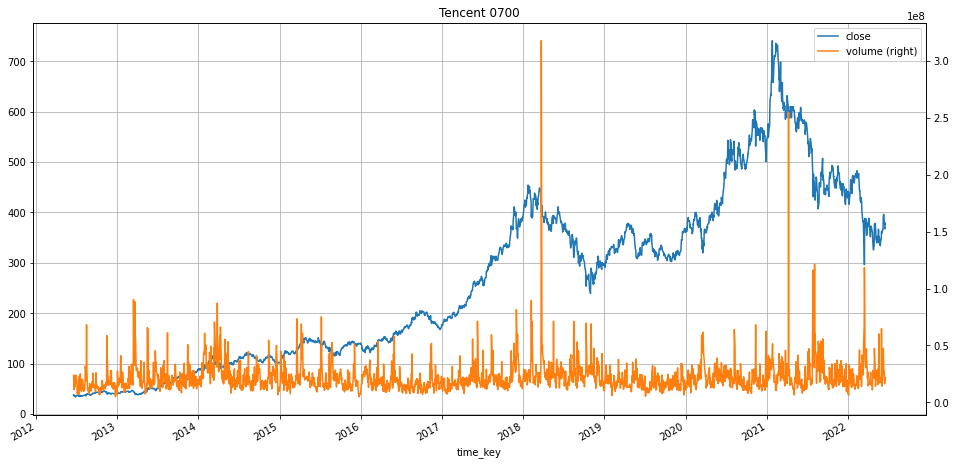

In [72]:
df[['close','volume']].plot(grid=True, title='Tencent 0700',figsize=(16,8),secondary_y=['volume'])  

<AxesSubplot:title={'center':'0700 volatility'}, xlabel='time_key'>

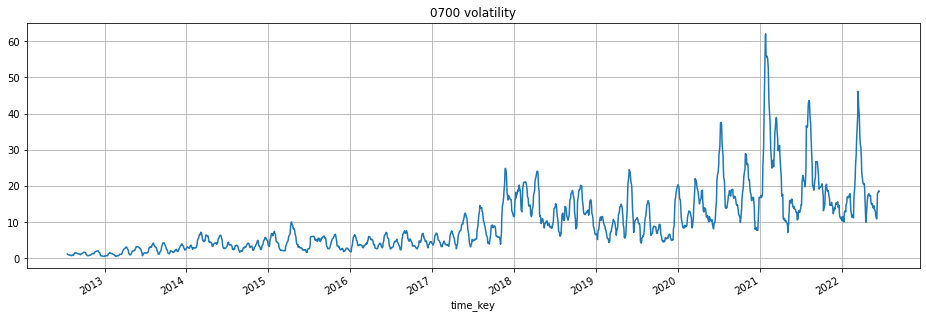

In [73]:
df['close'].rolling(22).std(ddof=0).plot(grid=True, title="0700 volatility", figsize=(16,5))

In [21]:
# https://dspyt.com/simple-returns-log-return-and-volatility-simple-introduction/
# https://blog.csdn.net/hzk427/article/details/105176693
# https://wizardforcel.gitbooks.io/python-quant-uqer/content/224.html
# https://www.zhihu.com/question/51713524
# https://uqer.datayes.com/help/faqCAL/#%E4%BB%80%E4%B9%88%E6%98%AFCAL%EF%BC%9F
# https://wizardforcel.gitbooks.io/python-quant-uqer/content/231.html
# https://wizardforcel.gitbooks.io/python-quant-uqer/content/235.html
# https://wizardforcel.gitbooks.io/python-quant-uqer/content/237.html

In [74]:
import numpy as np

In [75]:
df['simple_returns'] = df.close.pct_change()
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff() 
df['log_return'] = log_return(df.close)

In [76]:
%%javascript
//IPython.OutputArea.auto_scroll_threshold = 9999; //设置输出>9999时才出现滑动窗口
IPython.OutputArea.prototype._should_scroll = function(){return false} // 设置不出现滑动窗口 true, auto, false

<IPython.core.display.Javascript object>

array([<AxesSubplot:xlabel='time_key'>, <AxesSubplot:xlabel='time_key'>],
      dtype=object)

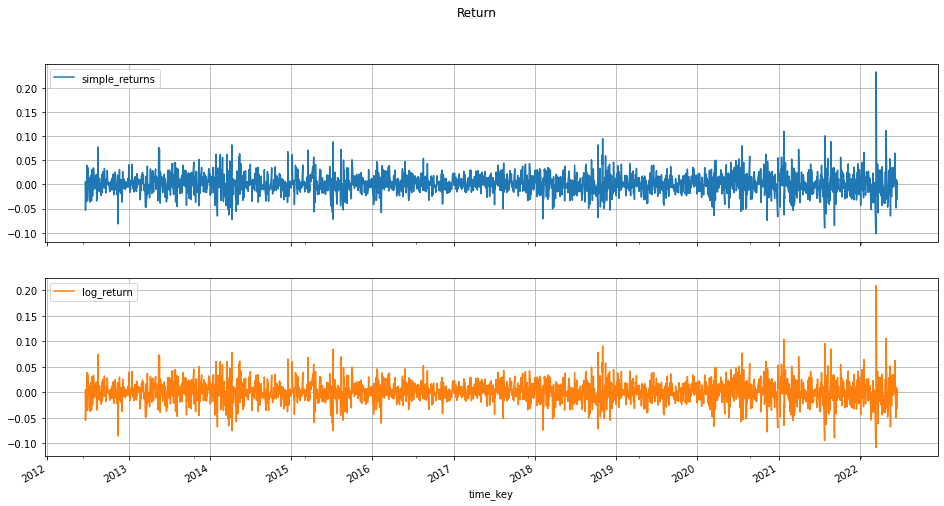

In [77]:
df[['simple_returns','log_return']].plot(subplots=True, grid=True, title='Return',figsize=(16,8))  

In [78]:
df[['simple_returns','log_return']].describe()

,simple_returns,log_return
count,2458.000000,2458.000000
mean,0.001162,0.000922
std,0.021997,0.021880
min,-0.102362,-0.107989
25%,-0.010851,-0.010911
50%,0.000625,0.000625
75%,0.012961,0.012878
max,0.232794,0.209283


<AxesSubplot:title={'center':'Realized Volatility'}, xlabel='time_key'>

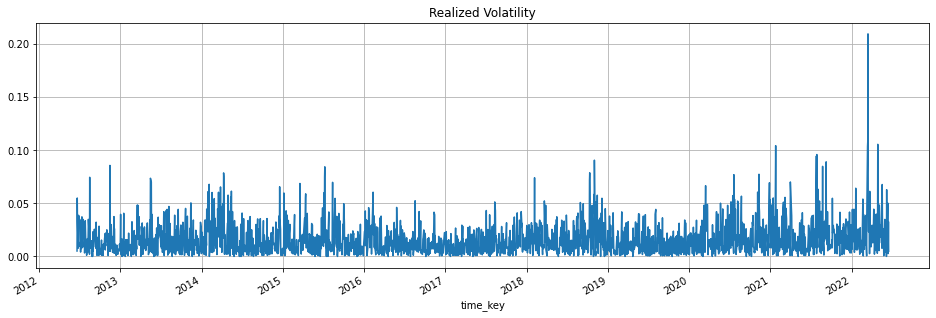

In [79]:
def realized_volatility(series):
    return np.sqrt(np.sum(series**2))
df['log_return'].agg(realized_volatility).plot(grid=True, title="Realized Volatility", figsize=(16,5))

<AxesSubplot:title={'center':'Realized Volatility'}, xlabel='time_key'>

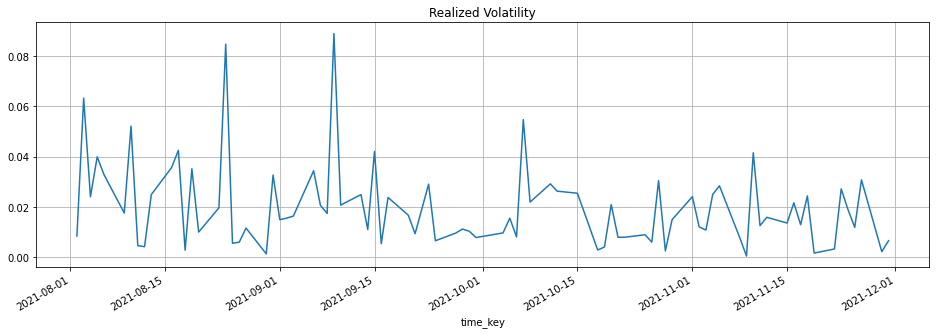

In [80]:
df.loc['2021-08':'2021-11']['log_return'].agg(realized_volatility).plot(grid=True, title="Realized Volatility", figsize=(16,5))

In [81]:
# https://www.learnpythonwithrune.org/calculate-the-volatility-of-historic-stock-prices-with-pandas-and-python/
volatility = df['log_return'].std()*252**.5

Text(0.5, 1.0, '0700 volatility:34.73%')

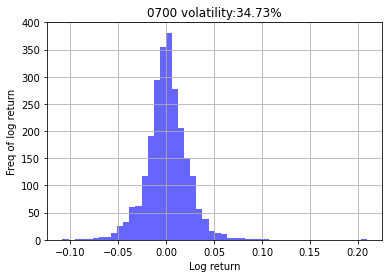

In [82]:
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
df['log_return'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('0700 volatility:'+ str_vol + '%')

In [83]:
df['log_rtn'] = np.log(df['close']).diff()

In [84]:
def real_vol(window=22, dpy=252, log_rtn_col='log_rtn'):
    # https://stackoverflow.com/questions/43284304/how-to-compute-volatility-standard-deviation-in-rolling-window-in-pandas
    # window: trading days in rolling window
    # dpy: trading days per year
    ann_factor = dpy / window

    # Var Swap (returns are not demeaned)
    #df['real_var'] = np.square(df['log_rtn']).rolling(window).sum() * ann_factor
    #df['real_vol'] = np.sqrt(df['real_var'])

    # Classical (returns are demeaned, dof=1)
    real_var = df[log_rtn_col].rolling(window).var() * ann_factor
    return np.sqrt(real_var)    

<AxesSubplot:xlabel='time_key'>

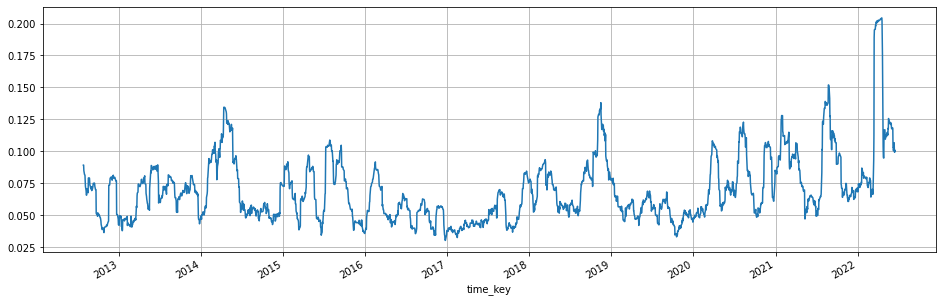

In [85]:
np.sqrt(np.log(df['close']).diff().rolling(25).var() * 252/22).plot(grid=True, figsize=(16,5))

<AxesSubplot:xlabel='time_key'>

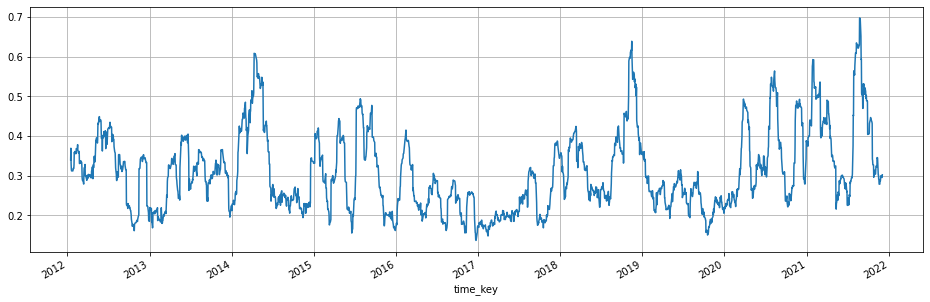

In [34]:
(df['close'].pct_change().rolling(25).std(ddof=0)*(252**0.5)).plot(grid=True, figsize=(16,5))

<AxesSubplot:xlabel='time_key'>

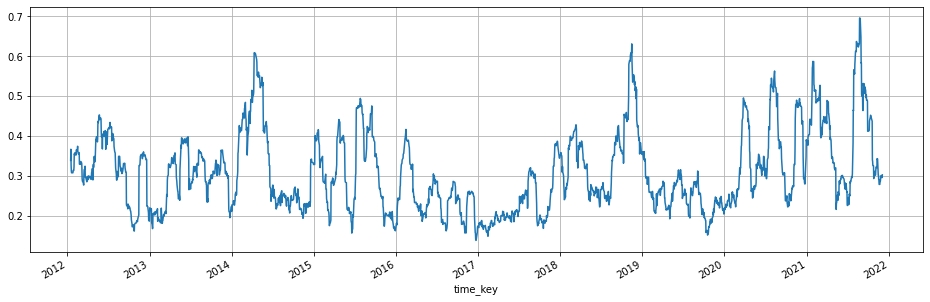

In [35]:
((np.log(df['close']).diff()).rolling(25).std(ddof=0)*(252**0.5)).plot(grid=True, figsize=(16,5))

In [36]:
def real_vol2(w):
    return (np.log(df['close']).diff()).rolling(w).std(ddof=0)*(252**0.5)

In [37]:
df['real_vol_22'] = real_vol2(22)
df['real_vol_44'] = real_vol2(44)
df['real_vol_66'] = real_vol2(66)
df['real_vol_132'] = real_vol2(132)

<AxesSubplot:title={'center':'Realized Volatility'}, xlabel='time_key'>

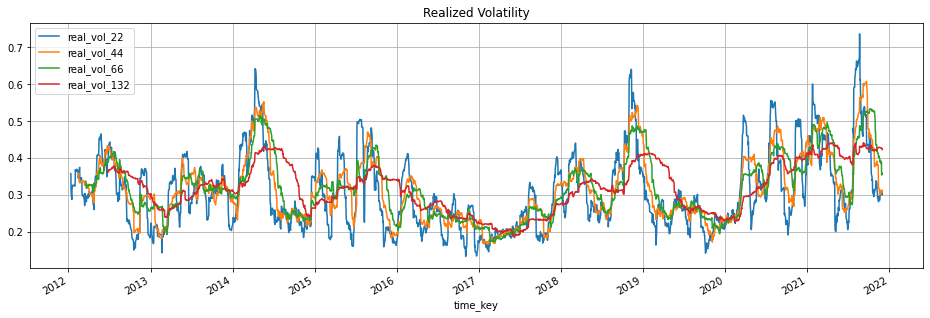

In [38]:
df[['real_vol_22','real_vol_44','real_vol_66','real_vol_132']].plot(grid=True, title="Realized Volatility", figsize=(16,5))

<AxesSubplot:xlabel='Realized Volatility per 22 day', ylabel='Freq of Realized Volatility'>

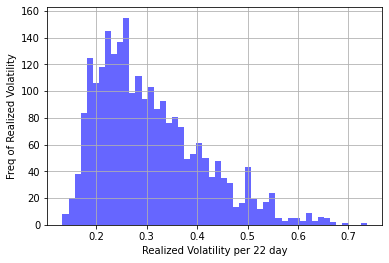

In [39]:
fig, ax = plt.subplots()
ax.set_xlabel('Realized Volatility per 22 day')
ax.set_ylabel('Freq of Realized Volatility')
df['real_vol_22'].hist(ax=ax, bins=50, alpha=0.6, color='b')

In [40]:
percentile = df[['real_vol_22','real_vol_44','real_vol_66','real_vol_132']].quantile([0.01, 0.25, 0.5, 0.75, 0.99])

<AxesSubplot:title={'center':'Volatility Percentile'}>

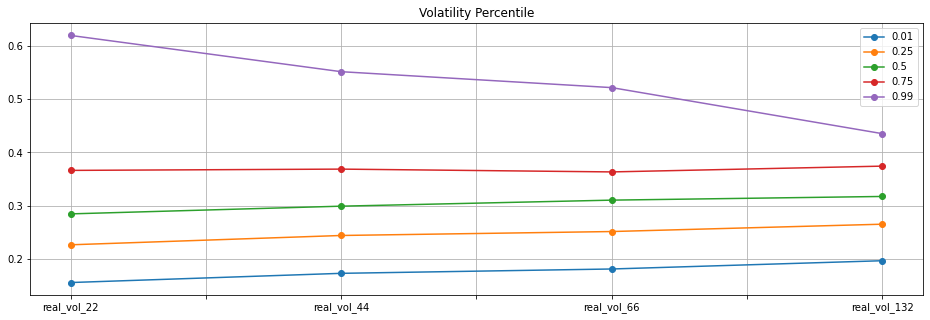

In [41]:
percentile.T.plot(marker='o', grid=True, title="Volatility Percentile", figsize=(16,5))

期权的盈亏图、平价公式和BS公式
https://www.zhihu.com/question/51713524
Fast Implied Volatility Calculation in Python
https://stackoverflow.com/questions/61289020/fast-implied-volatility-calculation-in-python
https://pypi.org/project/py-vollib-vectorized/

In [42]:
import numpy as np
from scipy.stats import norm
N = norm.cdf

def bs_call(S, K, T, r, vol):
    d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - np.exp(-r * T) * K * norm.cdf(d2)

def bs_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def find_vol(target_value, S, K, T, r, *args):
    MAX_ITERATIONS = 200
    PRECISION = 1.0e-5
    sigma = 0.5
    for i in range(0, MAX_ITERATIONS):
        price = bs_call(S, K, T, r, sigma)
        vega = bs_vega(S, K, T, r, sigma)
        diff = target_value - price  # our root
        if (abs(diff) < PRECISION):
            return sigma
        sigma = sigma + diff/vega # f(x) / f'(x)
    return sigma # value wasn't found, return best guess so far

In [43]:
S = 100 # 标的资产价格（S） Underlying asset price
K = 100 # 执行价格（K） Strike
T = 11  # 到期时间（t）(Annualized) time-to-expiration
r = 0.01 # 无风险利率（rf） Interest free rate
vol = 0.25 # 波动率

V_market = bs_call(S, K, T, r, vol)
implied_vol = find_vol(V_market, S, K, T, r)

print ('Implied vol: %.2f%%' % (implied_vol * 100))
print ('Market price = %.2f' % V_market)
print ('Model price = %.2f' % bs_call(S, K, T, r, implied_vol))

Implied vol: 25.00%
Market price = 35.94
Model price = 35.94


In [44]:
find_vol(target_value=18.8, S=462, K=460, T=25/365, r=0.01)

0.36630724074875826

In [45]:
%%time
size = 10000
S = np.random.randint(100, 200, size)
K = S * 1.25
T = np.ones(size)
R = np.random.randint(0, 3, size) / 100
vols = np.random.randint(15, 50, size) / 100
prices = bs_call(S, K, T, R, vols)

params = np.vstack((prices, S, K, T, R, vols))
vols = list(map(find_vol, *params))

CPU times: user 10.9 s, sys: 917 ms, total: 11.8 s
Wall time: 10.8 s


In [46]:
snapshots.columns

Index(['code', 'update_time', 'last_price', 'open_price', 'high_price',
       'low_price', 'prev_close_price', 'volume', 'turnover', 'turnover_rate',
       ...
       'pre_turnover', 'pre_change_val', 'pre_change_rate', 'pre_amplitude',
       'after_price', 'after_high_price', 'after_low_price',
       'after_change_val', 'after_change_rate', 'after_amplitude'],
      dtype='object', length=133)

In [47]:
ret, data = quote_ctx.get_market_snapshot(['HK.00700'])
if ret == RET_OK:
    strike_snapshot = data
else:
    print('error:', data)
strike_snapshot

,code,update_time,last_price,open_price,high_price,low_price,prev_close_price,volume,turnover,turnover_rate,...,pre_turnover,pre_change_val,pre_change_rate,pre_amplitude,after_price,after_high_price,after_low_price,after_change_val,after_change_rate,after_amplitude
0,HK.00700,2022-06-17 16:08:12,369.4,361.8,374.6,361.8,367.6,19483010,7.202702e+09,0.202,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [48]:
strike_code = 'HK.00700'

In [49]:
strike_price = strike_snapshot['last_price'][0]
atm_price = round(strike_price/10)*10
strike_price, atm_price

(369.4, 370)

In [50]:
recent_month = expiration_dates['strike_time'][0]
recent_month

'2022-06-29'

In [51]:
ret, data = quote_ctx.get_option_chain(code=strike_code, start=recent_month, end=recent_month)
if ret == RET_OK:
    recent_month_chains = data
else:
    print('error:', data)
recent_month_chains  

,code,name,lot_size,stock_type,option_type,stock_owner,strike_time,strike_price,suspension,stock_id,index_option_type
0,HK.TCH220629C220000,腾讯 220629 220.00 购,100,DRVT,CALL,HK.00700,2022-06-29,220.0,False,80339294,N/A
1,HK.TCH220629P220000,腾讯 220629 220.00 沽,100,DRVT,PUT,HK.00700,2022-06-29,220.0,False,80339331,N/A
2,HK.TCH220629C225000,腾讯 220629 225.00 购,100,DRVT,CALL,HK.00700,2022-06-29,225.0,False,80339487,N/A
3,HK.TCH220629P225000,腾讯 220629 225.00 沽,100,DRVT,PUT,HK.00700,2022-06-29,225.0,False,80339240,N/A
4,HK.TCH220629C230000,腾讯 220629 230.00 购,100,DRVT,CALL,HK.00700,2022-06-29,230.0,False,80339324,N/A
...,...,...,...,...,...,...,...,...,...,...,...
211,HK.TCH220629P730000,腾讯 220629 730.00 沽,100,DRVT,PUT,HK.00700,2022-06-29,730.0,False,80258428,N/A
212,HK.TCH220629C740000,腾讯 220629 740.00 购,100,DRVT,CALL,HK.00700,2022-06-29,740.0,False,80258392,N/A
213,HK.TCH220629P740000,腾讯 220629 740.00 沽,100,DRVT,PUT,HK.00700,2022-06-29,740.0,False,80258434,N/A
214,HK.TCH220629C750000,腾讯 220629 750.00 购,100,DRVT,CALL,HK.00700,2022-06-29,750.0,False,80258739,N/A


In [52]:
recent_month_call_code_list = recent_month_chains[recent_month_chains['option_type']=='CALL']['code'].tolist()
recent_month_put_code_list = recent_month_chains[recent_month_chains['option_type']=='PUT']['code'].tolist()
recent_month_call_code_list[:10], recent_month_put_code_list[:10]

(['HK.TCH220629C220000',
  'HK.TCH220629C225000',
  'HK.TCH220629C230000',
  'HK.TCH220629C235000',
  'HK.TCH220629C240000',
  'HK.TCH220629C245000',
  'HK.TCH220629C250000',
  'HK.TCH220629C255000',
  'HK.TCH220629C260000',
  'HK.TCH220629C265000'],
 ['HK.TCH220629P220000',
  'HK.TCH220629P225000',
  'HK.TCH220629P230000',
  'HK.TCH220629P235000',
  'HK.TCH220629P240000',
  'HK.TCH220629P245000',
  'HK.TCH220629P250000',
  'HK.TCH220629P255000',
  'HK.TCH220629P260000',
  'HK.TCH220629P265000'])

In [53]:
ret, data = quote_ctx.get_market_snapshot(recent_month_call_code_list)
if ret == RET_OK:
    recent_month_call_snapshots = data
else:
    print('error:', data)

In [54]:
ret, data = quote_ctx.get_market_snapshot(recent_month_put_code_list)
if ret == RET_OK:
    recent_month_put_snapshots = data
else:
    print('error:', data)

In [55]:
recent_month_call_iv = recent_month_call_snapshots[['option_strike_price','option_implied_volatility']].set_index('option_strike_price')
recent_month_put_iv = recent_month_put_snapshots[['option_strike_price','option_implied_volatility']].set_index('option_strike_price')
recent_month_call_iv = recent_month_call_iv.rename(columns={'option_implied_volatility':'Call'})
recent_month_put_iv = recent_month_put_iv.rename(columns={'option_implied_volatility':'Put'})
recent_month_call_iv,recent_month_put_iv

(                        Call
 option_strike_price         
 220.00               134.655
 225.00               129.605
 230.00               124.646
 235.00               119.775
 240.00               115.173
 ...                      ...
 720.00               108.153
 727.95               109.762
 730.00               110.174
 740.00               112.164
 750.00               185.807
 
 [108 rows x 1 columns],
                         Put
 option_strike_price        
 220.00               89.498
 225.00               85.841
 230.00               82.259
 235.00               92.750
 240.00               75.307
 ...                     ...
 720.00                0.000
 727.95                0.000
 730.00                0.000
 740.00                0.000
 750.00                0.000
 
 [107 rows x 1 columns])

In [56]:
recent_month_iv = pd.concat([recent_month_call_iv,recent_month_put_iv],axis=1, join='inner')
recent_month_iv

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [57]:
recent_month_iv.loc[atm_price-100:atm_price+100].plot(marker='o', title="%s Volatility Smile" % recent_month, figsize=(9,7))

NameError: name 'recent_month_iv' is not defined

如何使用期权的波动率曲面？
https://www.zhihu.com/question/311806661

In [58]:
expiration_dates['strike_time'] = pd.to_datetime(expiration_dates['strike_time'])
atm_calendar_codes = []
for day in expiration_dates['strike_time']:
    atm_calendar_codes.append('HK.TCH%sC%s000' % (day.strftime('%y%m%d'), atm_price))
    atm_calendar_codes.append('HK.TCH%sP%s000' % (day.strftime('%y%m%d'), atm_price))
atm_calendar_codes 

['HK.TCH220629C370000',
 'HK.TCH220629P370000',
 'HK.TCH220728C370000',
 'HK.TCH220728P370000',
 'HK.TCH220830C370000',
 'HK.TCH220830P370000',
 'HK.TCH220929C370000',
 'HK.TCH220929P370000',
 'HK.TCH221229C370000',
 'HK.TCH221229P370000',
 'HK.TCH230330C370000',
 'HK.TCH230330P370000',
 'HK.TCH230629C370000',
 'HK.TCH230629P370000']

In [59]:
ret, data = quote_ctx.get_market_snapshot(atm_calendar_codes)
if ret == RET_OK:
    atm_calendar_snapshots = data
else:
    print('error:', data)

In [60]:
atm_calenda_call_iv = atm_calendar_snapshots[atm_calendar_snapshots['option_type']=='CALL']
atm_calenda_call_iv = atm_calenda_call_iv[['strike_time','option_implied_volatility']].set_index('strike_time')

atm_calenda_put_iv = atm_calendar_snapshots[atm_calendar_snapshots['option_type']=='PUT']
atm_calenda_put_iv = atm_calenda_put_iv[['strike_time','option_implied_volatility']].set_index('strike_time')

atm_calenda_call_iv = atm_calenda_call_iv.rename(columns={'option_implied_volatility':'Call'})
atm_calenda_put_iv = atm_calenda_put_iv.rename(columns={'option_implied_volatility':'Put'})
atm_calenda_call_iv, atm_calenda_put_iv

(               Call
 strike_time        
 2022-06-29   43.124
 2022-07-28   42.477
 2022-08-30   42.340
 2022-09-29   41.831
 2022-12-29   41.473
 2023-03-30   41.728
 2023-06-29   41.722,
                 Put
 strike_time        
 2022-06-29   39.623
 2022-07-28   39.777
 2022-08-30   39.650
 2022-09-29   39.012
 2022-12-29   37.612
 2023-03-30   36.389
 2023-06-29   35.648)

<AxesSubplot:title={'center':'ATM 370 Calendar Volatility'}, xlabel='strike_time'>

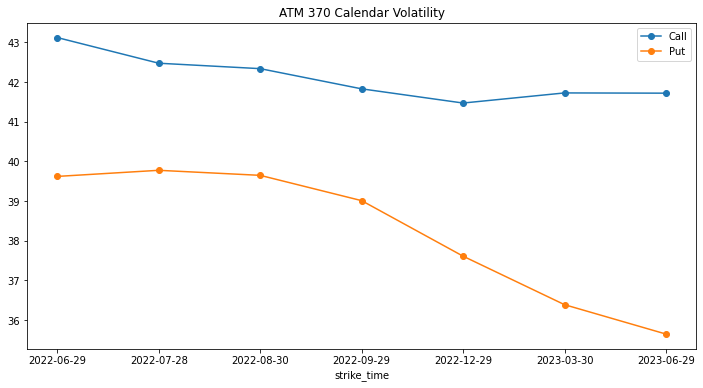

In [61]:
atm_calendar_iv = pd.concat([atm_calenda_call_iv, atm_calenda_put_iv],axis=1, join='inner')
atm_calendar_iv.plot(marker='o', title="ATM %s Calendar Volatility" % atm_price , figsize=(12,6))

In [62]:
cols = []
call_iv = {'index': 'call'}
put_iv = {'index':'put'}
for day in expiration_dates['strike_time']:
    days = (day-datetime.now()).days
    col = 'real_vol_%s' % days
    cols.append(col)
    call_iv[col] = atm_calenda_call_iv.loc[day.strftime('%Y-%m-%d')][0]/100
    put_iv[col] = atm_calenda_put_iv.loc[day.strftime('%Y-%m-%d')][0]/100
    df[col] = real_vol2(days)
 
percentile = df[cols].quantile([0.01, 0.25, 0.5, 0.75, 0.99])

In [63]:
percentile.reset_index()

,index,real_vol_11,real_vol_40,real_vol_73,real_vol_103,real_vol_194,real_vol_285,real_vol_376
0,0.01,0.128976,0.172952,0.183881,0.188417,0.209117,0.219185,0.226711
1,0.25,0.207913,0.242961,0.252738,0.262587,0.275702,0.287040,0.294190
2,0.50,0.265904,0.299224,0.308233,0.311129,0.322332,0.321037,0.318064
3,0.75,0.356031,0.369291,0.364933,0.373067,0.364036,0.351381,0.344206
4,0.99,0.659617,0.552030,0.506809,0.462379,0.443845,0.427050,0.418287


In [64]:
call_iv

{'index': 'call',
 'real_vol_11': 0.43124,
 'real_vol_40': 0.42477,
 'real_vol_73': 0.42340000000000005,
 'real_vol_103': 0.41831,
 'real_vol_194': 0.41473,
 'real_vol_285': 0.41728000000000004,
 'real_vol_376': 0.41722000000000004}

In [65]:
t = pd.DataFrame([call_iv, put_iv])
t = t.set_index('index')
t

,real_vol_11,real_vol_40,real_vol_73,real_vol_103,real_vol_194,real_vol_285,real_vol_376
index,,,,,,,
call,0.43124,0.42477,0.4234,0.41831,0.41473,0.41728,0.41722
put,0.39623,0.39777,0.3965,0.39012,0.37612,0.36389,0.35648


In [66]:
from labellines import labelLines

In [67]:
!pip install matplotlib-label-lines

Looking in indexes: http://mirrors.tencentyun.com/pypi/simple


Text(0.5, 1.0, 'Volatility Percentile')

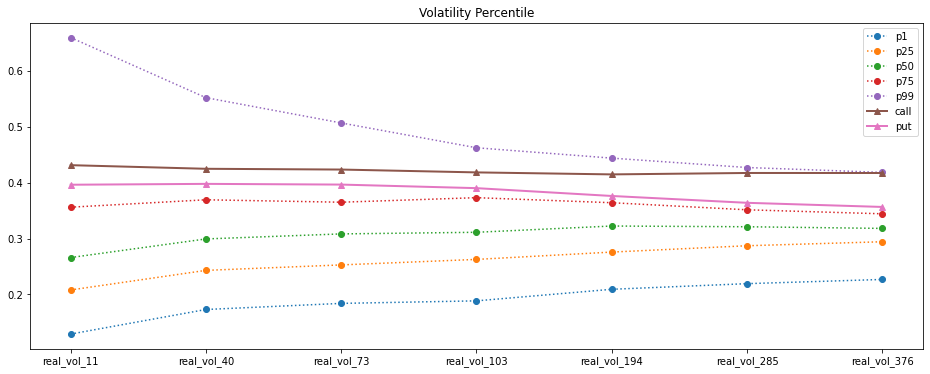

In [68]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(percentile.T, marker='o',linestyle=':', label=list(map(lambda x: 'p%s'% round(x*100),[0.01, 0.25, 0.5, 0.75, 0.99])))
ax.plot(t.T, marker='^',linewidth=2,label=['call','put'])
ax.legend()
ax.set_title('Volatility Percentile') #设置图名为Simple Plot

In [69]:
list(map(lambda x: 'p%s'% round(x*100),[0.01, 0.25, 0.5, 0.75, 0.99]))

['p1', 'p25', 'p50', 'p75', 'p99']